## Mapping with `splot` and `PySAL`

### Imports

In [1]:
import libpysal.api as lp
from libpysal import examples
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

% matplotlib inline

### Data Preparation

In [2]:
shp_link = examples.get_path("NAT.shp")

In [3]:
# get shape file
df = gpd.read_file(shp_link)
# and read csv directly from link
vote_table = pd.read_csv("https://gist.github.com/ljwolf/bfc78bdb34f87d741f705eda68793da3/raw/e3a93531fe074ef8a9b322008f24f7fdc9f4ffad/US_County_Level_Presidential_Results_08-16.csv")

In [4]:
df.shape

(3085, 70)

In [5]:
# calculate two-part vote share dem / (dem + repub)
years = [2008, 2012, 2016]
for year in years:
    vote_table[str(year)+'2p_voteshare'] = vote_table["dem_"+str(year)] / (vote_table["dem_"+str(year)] + vote_table["gop_"+str(year)])

In [6]:
# calculate total count
for year in years:
    vote_table[str(year)+"total_counts"] = vote_table["dem_"+str(year)] + vote_table["gop_"+str(year)]

In [7]:
vote_table.shape

(3112, 20)

In [8]:
vote_table.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,20082p_voteshare,20122p_voteshare,20162p_voteshare,2008total_counts,2012total_counts,2016total_counts
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924,0.532316,0.466327,0.366585,18737,17863,17543
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28,0.124199,0.102322,0.104328,1248,1163,1294
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549,0.263663,0.232437,0.156339,28142,28184,28694
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108,0.526385,0.581863,0.539337,3051,2834,3076
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196,0.252344,0.216384,0.171013,2453,2417,2339


In [9]:
# merge
gdf = df.merge(vote_table, left_on='FIPSNO', right_on='fips_code')

# test implication of different shapes and which data is missing
for fips in df['FIPSNO']:
    if not np.any(fips == gdf['fips_code']):
        print('Missing: ', fips)
        print(df[df['FIPSNO'] == fips].head())
        
        
gdf[gdf['NAME'] == 'Clifton Forge']

Missing:  51560
               NAME STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  STFIPS  COFIPS  \
1522  Clifton Forge   Virginia         51       560  51560      51     560   

      FIPSNO  SOUTH  HR60                        ...                          \
1522   51560      1   0.0                        ...                           

          BLK90      GI59      GI69      GI79      GI89       FH60  FH70  \
1522  14.853601  0.280873  0.338203  0.351892  0.409826  16.401734  13.9   

           FH80      FH90                                           geometry  
1522  11.485452  19.02131  POLYGON ((-79.80414581298828 37.81179428100586...  

[1 rows x 70 columns]
Missing:  12025
      NAME STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  STFIPS  COFIPS  FIPSNO  \
2889  Dade    Florida         12       025  12025      12      25   12025   

      SOUTH       HR60                        ...                          \
2889      1  10.516405                        ...                           

      

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,total_2016,dem_2016,gop_2016,oth_2016,20082p_voteshare,20122p_voteshare,20162p_voteshare,2008total_counts,2012total_counts,2016total_counts


### Extract data to be plotted and plot

In [10]:
x = gdf['20162p_voteshare'].values
y = gdf['2016total_counts'].values

In [11]:
import splot
from splot.mapping import vba_choropleth, value_by_alpha_cmap
from importlib import reload
import matplotlib.cm

reload(splot.mapping)

<module 'splot.mapping' from '/Users/steffie/code/splot/splot/mapping.py'>

In [12]:
from splot._viz_utils import shift_colormap, truncate_colormap

In [13]:
cmap = plt.cm.seismic
new_cmap = shift_colormap(cmap, start=0, midpoint=0.5, stop=1)

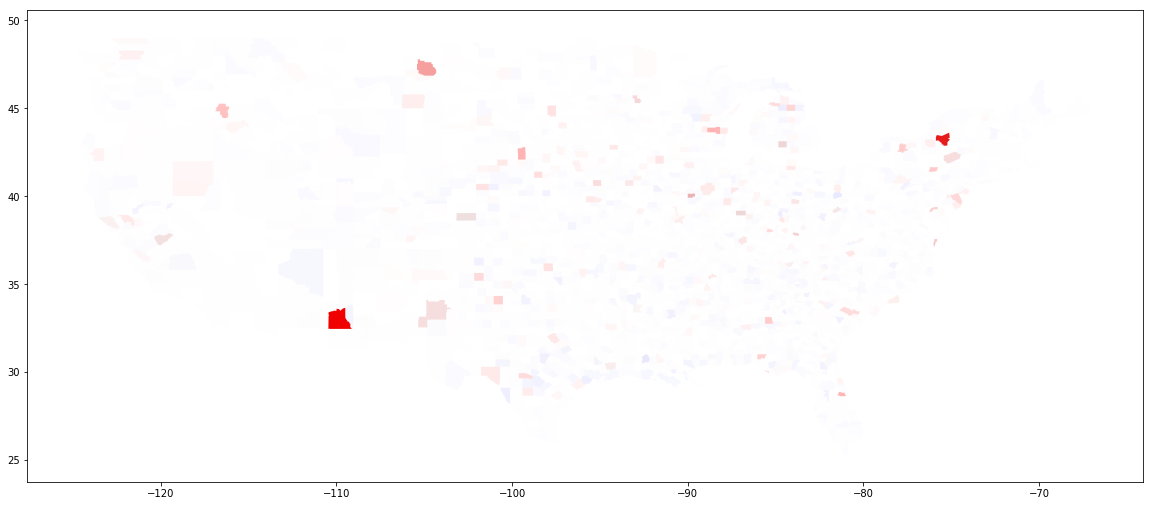

In [14]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
vba_choropleth(x, y, gdf, cmap='seismic', ax=ax, divergent=False)
plt.show()

In [15]:
rgba = value_by_alpha_cmap(x, y, cmap='seismic', divergent=False)

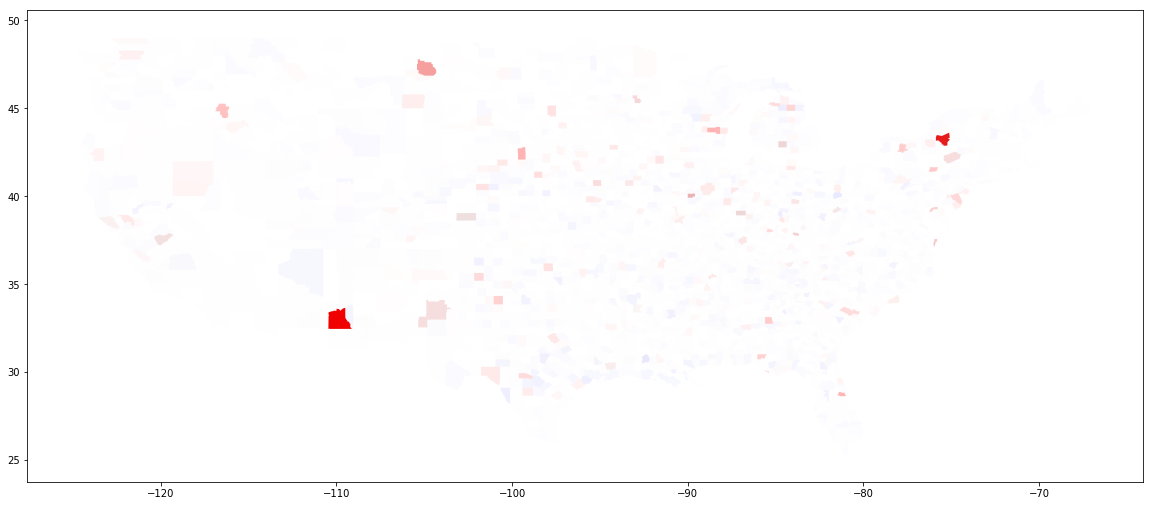

In [16]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
gdf.plot(color= rgba, ax=ax)
plt.show()

In [17]:
import mapclassify

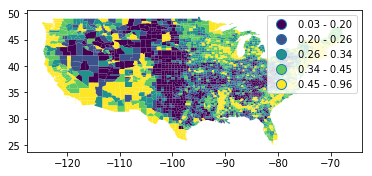

In [18]:
gdf.plot(column='20162p_voteshare', scheme='quantiles', legend=True)

In [19]:
from splot._viz_value_by_alpha_mpl import mapclassify_bin

In [20]:
bins = mapclassify_bin(y, classifier='quantiles', k=5)
bins

                     Quantiles                     
 
   Lower                Upper                 Count
              x[i] <=    3734.400               617
   3734.400 < x[i] <=    7636.600               616
   7636.600 < x[i] <=   14571.200               617
  14571.200 < x[i] <=   37052.200               616
  37052.200 < x[i] <= 2197217.000               617

In [21]:
rgb_bins = mapclassify_bin(x, classifier='quantiles', k=5)
bins

                     Quantiles                     
 
   Lower                Upper                 Count
              x[i] <=    3734.400               617
   3734.400 < x[i] <=    7636.600               616
   7636.600 < x[i] <=   14571.200               617
  14571.200 < x[i] <=   37052.200               616
  37052.200 < x[i] <= 2197217.000               617

In [22]:
values_y = bins.yb
values_y

array([0, 0, 2, ..., 3, 4, 4])

In [23]:
values_x = np.array(rgb_bins.yb)

In [24]:
new_rgba=value_by_alpha_cmap(values_x, values_y, divergent = True, cmap='RdBu')

In [25]:
new_rgba


array([[0.9657055 , 0.96724337, 0.9680892 , 1.        ],
       [0.9657055 , 0.96724337, 0.9680892 , 1.        ],
       [0.9657055 , 0.96724337, 0.9680892 , 0.        ],
       ...,
       [0.40853518, 0.66874279, 0.81453287, 0.5       ],
       [0.01960784, 0.18823529, 0.38039216, 1.        ],
       [0.01960784, 0.18823529, 0.38039216, 1.        ]])

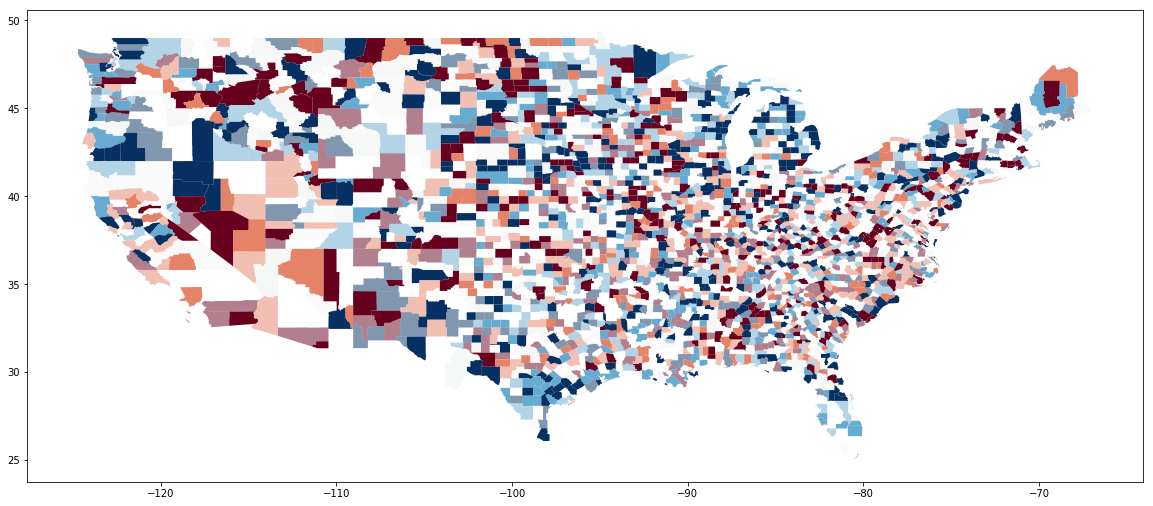

In [30]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
gdf.plot(color= new_rgba, ax=ax, legend=True)
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1228c7e80>)

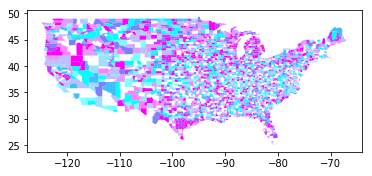

In [31]:
vba_choropleth(values_x, values_y, gdf, cmap='cool', divergent=True)

In [28]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')

In [29]:
cmap.__call__??

Signature: cmap.__call__(X, alpha=None, bytes=False)
Source:   
    def __call__(self, X, alpha=None, bytes=False):
        """
        Parameters
        ----------
        X : scalar, ndarray
            The data value(s) to convert to RGBA.
            For floats, X should be in the interval ``[0.0, 1.0]`` to
            return the RGBA values ``X*100`` percent along the Colormap line.
            For integers, X should be in the interval ``[0, Colormap.N)`` to
            return RGBA values *indexed* from the Colormap with index ``X``.
        alpha : float, None
            Alpha must be a scalar between 0 and 1, or None.
        bytes : bool
            If False (default), the returned RGBA values will be floats in the
            interval ``[0, 1]`` otherwise they will be uint8s in the interval
            ``[0, 255]``.

        Returns
        -------
        Tuple of RGBA values if X is scalar, otherwise an array of
        RGBA values with a shape of ``X.shape + (4, )``.

   